<a href="https://colab.research.google.com/github/Arshad221b/Sign-Language-Recognition-/blob/master/ASLwithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical
from keras.optimizers import Adam,SGD

In [3]:
import os
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gesture2Text/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gesture2Text/Dataset/test.csv')

In [8]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.9, 1.1],
    rescale=1./255  # Normalize pixel values
)

datagen.fit(X_train)

In [9]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(28, 28, 1), activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4, 4)))
classifier.add(BatchNormalization())
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 30:
        lr *= 0.1
    return lr

scheduler = LearningRateScheduler(lr_schedule)

In [10]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=50, steps_per_epoch=len(X_train) // 100, callbacks=[scheduler])

Epoch 1/50
275/275 [==============================] - 12s 39ms/step - loss: 1.2022 - accuracy: 0.6703
Epoch 2/50
275/275 [==============================] - 9s 34ms/step - loss: 0.2937 - accuracy: 0.9099
Epoch 3/50
275/275 [==============================] - 11s 38ms/step - loss: 0.1679 - accuracy: 0.9473
Epoch 4/50
275/275 [==============================] - 11s 39ms/step - loss: 0.1128 - accuracy: 0.9636
Epoch 5/50
275/275 [==============================] - 12s 42ms/step - loss: 0.0848 - accuracy: 0.9728
Epoch 6/50
275/275 [==============================] - 17s 62ms/step - loss: 0.0654 - accuracy: 0.9790
Epoch 7/50
275/275 [==============================] - 11s 41ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 8/50
275/275 [==============================] - 11s 40ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 9/50
275/275 [==============================] - 9s 33ms/step - loss: 0.0396 - accuracy: 0.9871
Epoch 10/50
275/275 [==============================] - 11s 39ms/step - loss: 0.0361 

In [13]:
accuracy = classifier.evaluate(x=X_test, y=y_test, batch_size=32)
print("Accuracy: ", accuracy[1])

225/225 [==============================] - 1s 5ms/step - loss: 0.5555 - accuracy: 0.8568
Accuracy:  0.8568042516708374


In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 16)          0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 3, 3, 16)          6

In [15]:
from keras.utils import plot_model

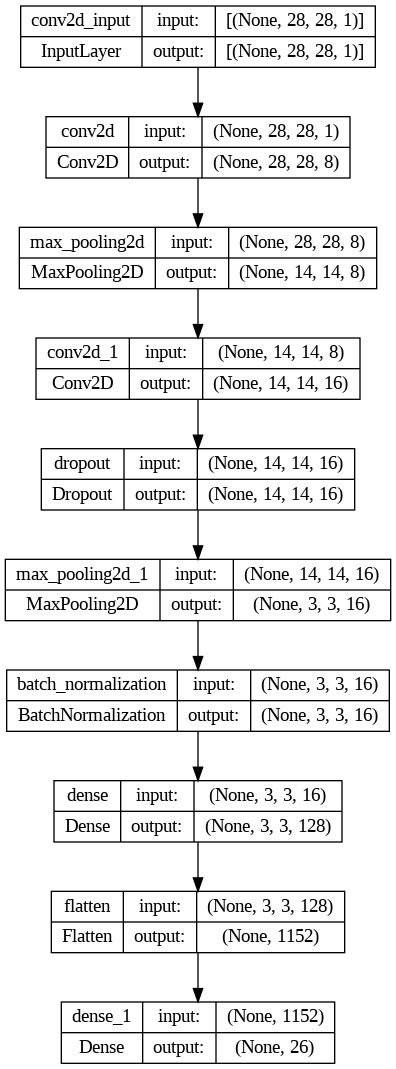

In [16]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Double check with Python 3


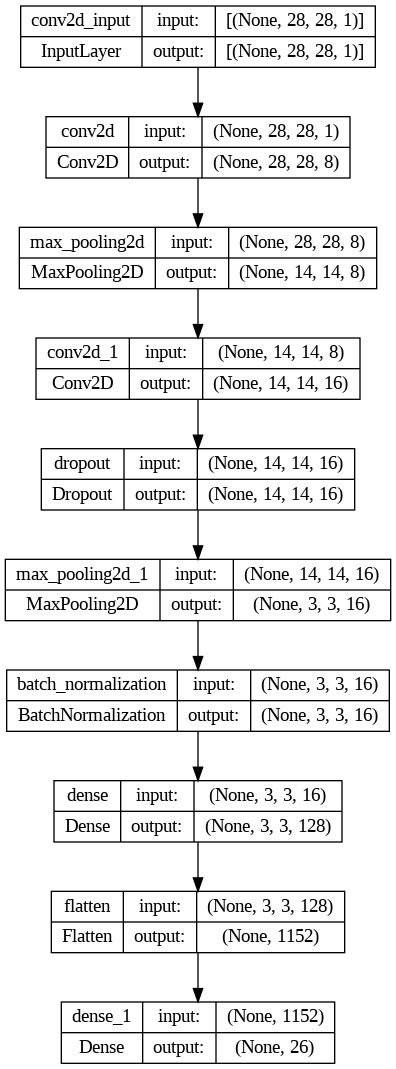

In [18]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [19]:
folder_id = 'B3_Iq1qtlLOYxKZ6TUERxdnvnEaigGc'
classifier.save('CNNmodel.h5')
!cp CNNmodel.h5 '/content/drive/MyDrive/Colab Notebooks/Gesture2Text/CNNmodel.h5'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
